In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, classification_report


In [12]:
data = pd.read_csv("data.csv")
data.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
print("Dataset shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())



Dataset shape: (7043, 21)

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


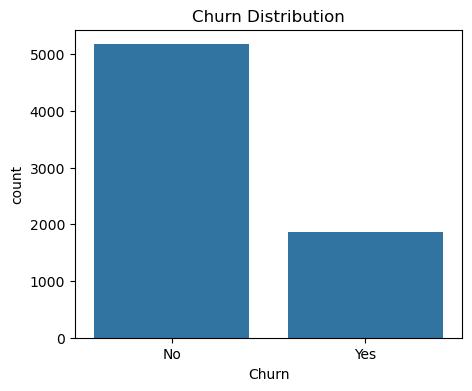

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()



In [15]:
# Converting TotalCharges to a numeric (it has some blank values)

data['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Filling \ missing values with median

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())



In [19]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)




In [18]:
cluster_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]


In [21]:
scaler_cluster = StandardScaler()
cluster_scaled_data = scaler_cluster.fit_transform(cluster_data)


In [22]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans_model.fit_predict(cluster_scaled_data)


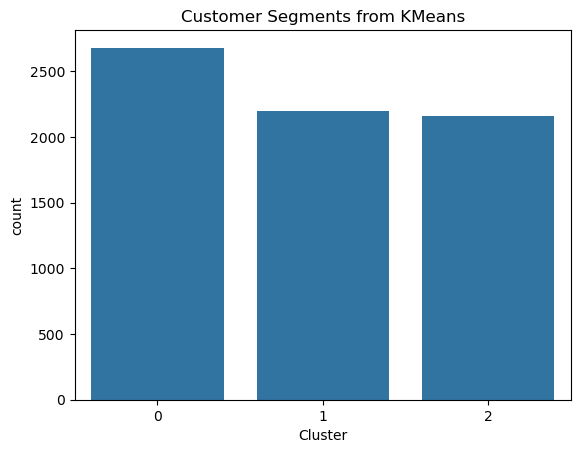

In [23]:
sns.countplot(x='Cluster', data=data)
plt.title("Customer Segments from KMeans")
plt.show()


In [24]:
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [26]:
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled = scaler_lr.transform(X_test)


In [27]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Model WITH clustering")
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Model WITH clustering
F1 Score: 0.614900314795383
ROC-AUC: 0.8411997209951173
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [28]:
X_baseline = data.drop(['customerID', 'Churn', 'Cluster'], axis=1)
X_baseline = pd.get_dummies(X_baseline, drop_first=True)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_baseline, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler_base = StandardScaler()
Xb_train_scaled = scaler_base.fit_transform(Xb_train)
Xb_test_scaled = scaler_base.transform(Xb_test)

baseline_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

baseline_model.fit(Xb_train_scaled, yb_train)

yb_pred = baseline_model.predict(Xb_test_scaled)
yb_prob = baseline_model.predict_proba(Xb_test_scaled)[:, 1]

print("\nBaseline Model (WITHOUT clustering)")
print("F1 Score:", f1_score(yb_test, yb_pred))
print("ROC-AUC:", roc_auc_score(yb_test, yb_prob))



Baseline Model (WITHOUT clustering)
F1 Score: 0.6134453781512605
ROC-AUC: 0.8412333049161694


In [29]:
f1_with_cluster = f1_score(y_test, y_pred)
f1_without_cluster = f1_score(yb_test, yb_pred)

print("\nF1 Improvement due to clustering:",
      f1_with_cluster - f1_without_cluster)



F1 Improvement due to clustering: 0.0014549366441224398
